# Specific Object YCB Dataset

In [1]:
%matplotlib inline
import cv2
import numpy as np
import torch
from torch.autograd import Variable
import quat_math
import pickle

from PIL import Image
import scipy.io as scio
from functools import partial
from object_pose_utils.utils import to_np

import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = 20, 12
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

## Helpful Image Viewing Functions

In [2]:
def imshowCV(img, axis = False):
    if not axis:
        plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
def imshow(img, axis = False, colorbar = False):
    if not axis:
        plt.axis('off')
    plt.imshow(img)
    if(colorbar):
        plt.colorbar()
    plt.show()
    
def torch2Img(img):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    disp_img = to_np(img)
    if len(disp_img.shape) == 4:
        disp_img = disp_img[0]
    disp_img = disp_img.transpose((1,2,0))
    disp_img = disp_img * std + mean
    return disp_img
    
#from generic_pose.utils.image_preprocessing import unprocessImages
def imshowTorch(img, axis = False):
    if not axis:
        plt.axis('off')
    disp_img = torch2Img(img)
    plt.imshow(disp_img.astype(np.uint8))
    #plt.imshow(unprocessImages(img)[0])
    plt.show()

def plotImageScatter(img, choose):
    coords = np.unravel_index(choose, img.shape[:2])    
    plt.axis('off')
    plt.imshow(img.astype(np.uint8))    
    plt.scatter(coords[1], coords[0], 50)
    #plt.colorbar()
    plt.show()

## Location of YCB Dataset

In [3]:
dataset_root = '/ssd0/datasets/ycb/YCB_Video_Dataset'

## Select Object Indices of Interest

| Object Indices |[]()|[]()|
|---|---|---|
| __1.__ 002_master_chef_can | __8.__ 009_gelatin_box      | __15.__ 035_power_drill       |
| __2.__ 003_cracker_box     | __9.__ 010_potted_meat_can  | __16.__ 036_wood_block        |
| __3.__ 004_sugar_box       | __10.__ 011_banana          | __17.__ 037_scissors          |
| __4.__ 005_tomato_soup_can | __11.__ 019_pitcher_base    | __18.__ 040_large_marker      |
| __5.__ 006_mustard_bottle  | __12.__ 021_bleach_cleanser | __19.__ 051_large_clamp       |
| __6.__ 007_tuna_fish_can   | __13.__ 024_bowl            | __20.__ 052_extra_large_clamp |
| __7.__ 008_pudding_box     | __14.__ 025_mug             | __21.__ 061_foam_brick        |


In [4]:
object_list = list(range(1,22))

## Select Dataset
Modes include train, syn, grid, valid, test and can be concatinated with "\_", e.g. "train\_syn"

In [5]:
mode = "train"

## Select Output Data Types

In [6]:
from object_pose_utils.datasets.pose_dataset import OutputTypes as otypes

output_format = [otypes.OBJECT_LABEL,
                 otypes.QUATERNION, 
                 otypes.IMAGE_CROPPED, 
                 otypes.DEPTH_POINTS_MASKED_AND_INDEXES]

## Load Dataset

In [7]:
from object_pose_utils.datasets.ycb_dataset import YcbDataset as YCBDataset
from object_pose_utils.datasets.ycb_dataset import YcbImagePreprocessor

with open('{0}/image_sets/classes.txt'.format(dataset_root)) as f:                                    
    classes = f.read().split()
classes.insert(0, '__background__')
dataset = YCBDataset(dataset_root, mode=mode, 
                     object_list = object_list, 
                     output_data = output_format, 
                     preprocessor = YcbImagePreprocessor,
                     image_size = [640, 480], num_points=1000)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

## Sample Data

In [8]:
for data in dataloader:
    obj, q, im, pts, chs = data
    break

print('{} at rotation {}'.format(classes[int(obj)], np.round(to_np(q)[0], 2)))

007_tuna_fish_can at rotation [ 0.4   0.8  -0.42  0.13]


### Image 

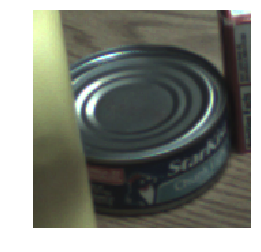

In [9]:
imshowTorch(im)

### Samples 

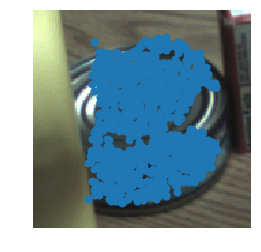

In [10]:
plotImageScatter(torch2Img(im), to_np(chs))

### Points

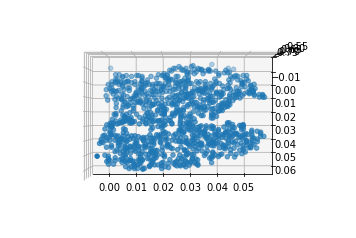

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pts_np = to_np(pts[0])
ax.scatter(pts_np[:,0], pts_np[:,1], pts_np[:,2])
ax.view_init(270, -90)
plt.show()